# Simple Rate of Return

In [1]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as wb 
import yfinance as yfin

In [2]:
yfin.pdr_override()

### Importing Stock Prices Data of Your of Choices 

In [4]:
itmg = wb.get_data_yahoo('ITMG.jk', start = '2019-01-01', end = '2020-01-01')
itmg.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,20250.0,20250.0,20250.0,20250.0,9990.890625,0
2019-01-02,20125.0,20150.0,19950.0,20075.0,9904.549805,1095100
2019-01-03,20200.0,20200.0,19825.0,19900.0,9818.208984,2248100
2019-01-04,19800.0,21775.0,19750.0,21575.0,10644.616211,3855300
2019-01-07,21825.0,22125.0,20825.0,20850.0,10286.917969,3383600


In [5]:
itmg.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,11325.0,11350.0,11150.0,11350.0,6465.961914,864900
2019-12-23,11350.0,11375.0,11150.0,11175.0,6366.267578,831300
2019-12-26,11175.0,11375.0,11150.0,11250.0,6408.994141,729700
2019-12-27,11200.0,11325.0,11150.0,11225.0,6394.751465,532400
2019-12-30,11225.0,11525.0,11225.0,11475.0,6537.173340,1387600


### Simple Rate of Return Formula 


$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

#### Calculating Daily Simple Rate of Return

In [16]:
itmg['simple_return'] = itmg['Adj Close']/ itmg['Adj Close'].shift(1) - 1
itmg.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
2019-01-01,20250.0,20250.0,20250.0,20250.0,9990.890625,0,NaN
2019-01-02,20125.0,20150.0,19950.0,20075.0,9904.549805,1095100,-0.008642
2019-01-03,20200.0,20200.0,19825.0,19900.0,9818.208984,2248100,-0.008717
2019-01-04,19800.0,21775.0,19750.0,21575.0,10644.616211,3855300,0.084171
2019-01-07,21825.0,22125.0,20825.0,20850.0,10286.917969,3383600,-0.033604


#### Visualizing Daily Rate of Simple Return 

In [19]:
import matplotlib.pyplot as plt

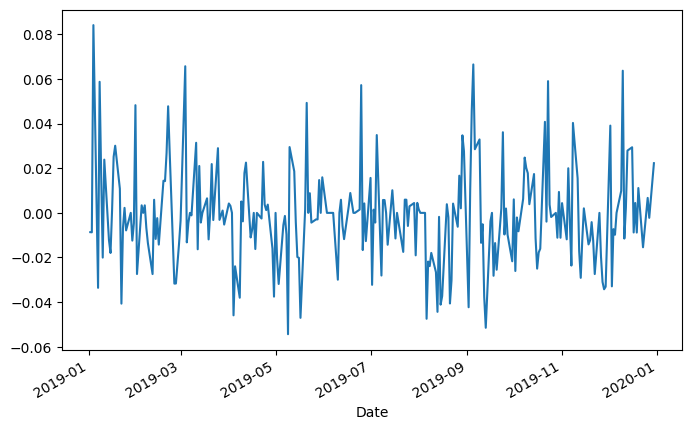

In [24]:
plt.figure(figsize = [8,5])
itmg['simple_return'].plot()
plt.show()

#### Average Daily Return

In [25]:
itmg['simple_return'].mean()

-0.0014119827678950913

#### Average Annual Return 

for a precise calculation is good to know of how many trading days in a year by counting the number of days per year from the data, for the sake of the simplycity of this we will use *250 days* as the total trading days as most of the years the active trading days were *250 days* 

In [27]:
itmg_annual_return = itmg['simple_return'].mean() * 250 #average trading days in a year
itmg_annual_return

-0.35299569197377284

In [33]:
print(f"{round(itmg_annual_return,3) * 100}%")

-35.3%


# Log Return

## Log Return Formula

$$
ln(\frac{P_t}{P_{t-1}})
$$

In [37]:
log_return = np.log(itmg['Adj Close'] / itmg['Adj Close'].shift(1))

In [38]:
itmg['log_return'] = log_return
itmg.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2019-01-01,20250.0,20250.0,20250.0,20250.0,9990.890625,0,NaN,NaN
2019-01-02,20125.0,20150.0,19950.0,20075.0,9904.549805,1095100,-0.008642,-0.008680
2019-01-03,20200.0,20200.0,19825.0,19900.0,9818.208984,2248100,-0.008717,-0.008756
2019-01-04,19800.0,21775.0,19750.0,21575.0,10644.616211,3855300,0.084171,0.080816
2019-01-07,21825.0,22125.0,20825.0,20850.0,10286.917969,3383600,-0.033604,-0.034181


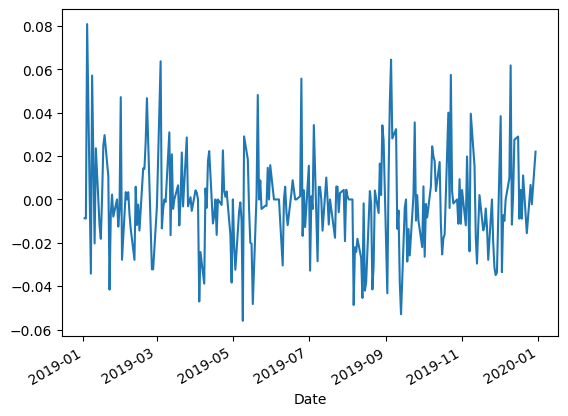

In [40]:
itmg['log_return'].plot()
plt.show()

In [42]:
itmg_annual_log_return = itmg['log_return'].mean() * 250 #average trading days in a year
itmg_annual_log_return

-0.41422742122305584

In [43]:
print(f"{round(itmg_annual_log_return,3) * 100}%")

-41.4%


# Course Notes

For calculating a single securities rate